In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as po
import plotly.express as px
import matplotlib.pyplot as plt
import datetime as dt
from plotly.subplots import make_subplots
from calendar import month_name
from datetime import time, timedelta 

In [2]:
cus = pd.read_csv('customer_data.csv')
cus.head(7)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,-26.471037,-49.115654
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,-23.584221,-46.674053


In [3]:
prod = pd.read_csv('product_data.csv')
prod.head(7)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff


In [4]:
orders = pd.read_csv("order_data.csv")
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.head(7)

,order_id,order_item_id,customer_unique_id,product_id,seller_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,871766c5855e863f6eccc05f988b23cb,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,eb28e67c4c0b83846050ddfb8a35d051,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-05-15,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,3818d81c6709e39d06b2738a8d3a2474,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-02-05,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,af861d436cfc08b2c2ddefd0ba074622,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08-20,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,64b576fb70d441e8f1b2d7d446e483c5,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-03-17,199.90,18.14,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,85c835d128beae5b4ce8602c491bf385,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,delivered,2017-05-15 21:42:34,2017-05-22 13:44:35,2017-06-06,21.90,12.69,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,635d9ac1680f03288e72ada3a1035803,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,delivered,2017-12-10 11:53:48,2017-12-18 22:03:38,2018-01-04,19.90,11.85,31.75


In [5]:
rv = pd.read_csv('product_review_score.csv')
rv['review_creation_date'] = pd.to_datetime(rv['review_creation_date'])
rv.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01


In [6]:
orders_prod = pd.merge(
    left = orders,
    right = prod,
    on = "product_id",
    how ="left"
)
rv_orders_prod = pd.merge(
    left = orders_prod,
    right = rv,
    on = "order_id",
    how ="left"
)
detail = pd.merge(
    left = rv_orders_prod,
    right = cus,
    on = "customer_unique_id",
    how ="left"
)
detail.columns

Index(['order_id', 'order_item_id', 'customer_unique_id', 'product_id',
       'seller_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'price', 'freight_value', 'payment_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'review_id', 'review_score',
       'review_comment_message', 'review_creation_date', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [7]:
top_products = detail[['product_category_name_english', 'payment_value']].groupby('product_category_name_english').sum().sort_values('payment_value', ascending=False).reset_index()
top_products.rename(columns={'payment_value': 'total_paid'}, inplace = True)
top_products

,product_category_name_english,total_paid
0,bed_bath_table,2005187.67
1,computers_accessories,1784394.17
2,health_beauty,1759844.96
3,furniture_decor,1638000.25
4,sports_leisure,1546546.95
...,...,...
66,flowers,2213.01
67,home_comfort_2,1766.54
68,cds_dvds_musicals,1199.43
69,fashion_childrens_clothes,892.10


In [8]:
top_products['Percentage of Sales'] = (top_products['total_paid'] /  top_products['total_paid'].sum()) * 100
top_products['Cum Percentage of Sales'] = top_products['Percentage of Sales'].cumsum()
top_products.head()

,product_category_name_english,total_paid,Percentage of Sales,Cum Percentage of Sales
0,bed_bath_table,2005187.67,9.141595,9.141595
1,computers_accessories,1784394.17,8.135004,17.276599
2,health_beauty,1759844.96,8.023085,25.299684
3,furniture_decor,1638000.25,7.467598,32.767282
4,sports_leisure,1546546.95,7.050665,39.817947


In [9]:
main_products = top_products[top_products['Cum Percentage of Sales'] <= 80]
main_products

,product_category_name_english,total_paid,Percentage of Sales,Cum Percentage of Sales
0,bed_bath_table,2005187.67,9.141595,9.141595
1,computers_accessories,1784394.17,8.135004,17.276599
2,health_beauty,1759844.96,8.023085,25.299684
3,furniture_decor,1638000.25,7.467598,32.767282
4,sports_leisure,1546546.95,7.050665,39.817947
5,watches_gifts,1527893.11,6.965623,46.783569
6,housewares,1194355.41,5.445033,52.228603
7,auto,898338.51,4.095501,56.324103
8,garden_tools,889147.37,4.053598,60.377701
9,cool_stuff,834714.53,3.805441,64.183142


<AxesSubplot:xlabel='product_category_name_english', ylabel='total_paid'>

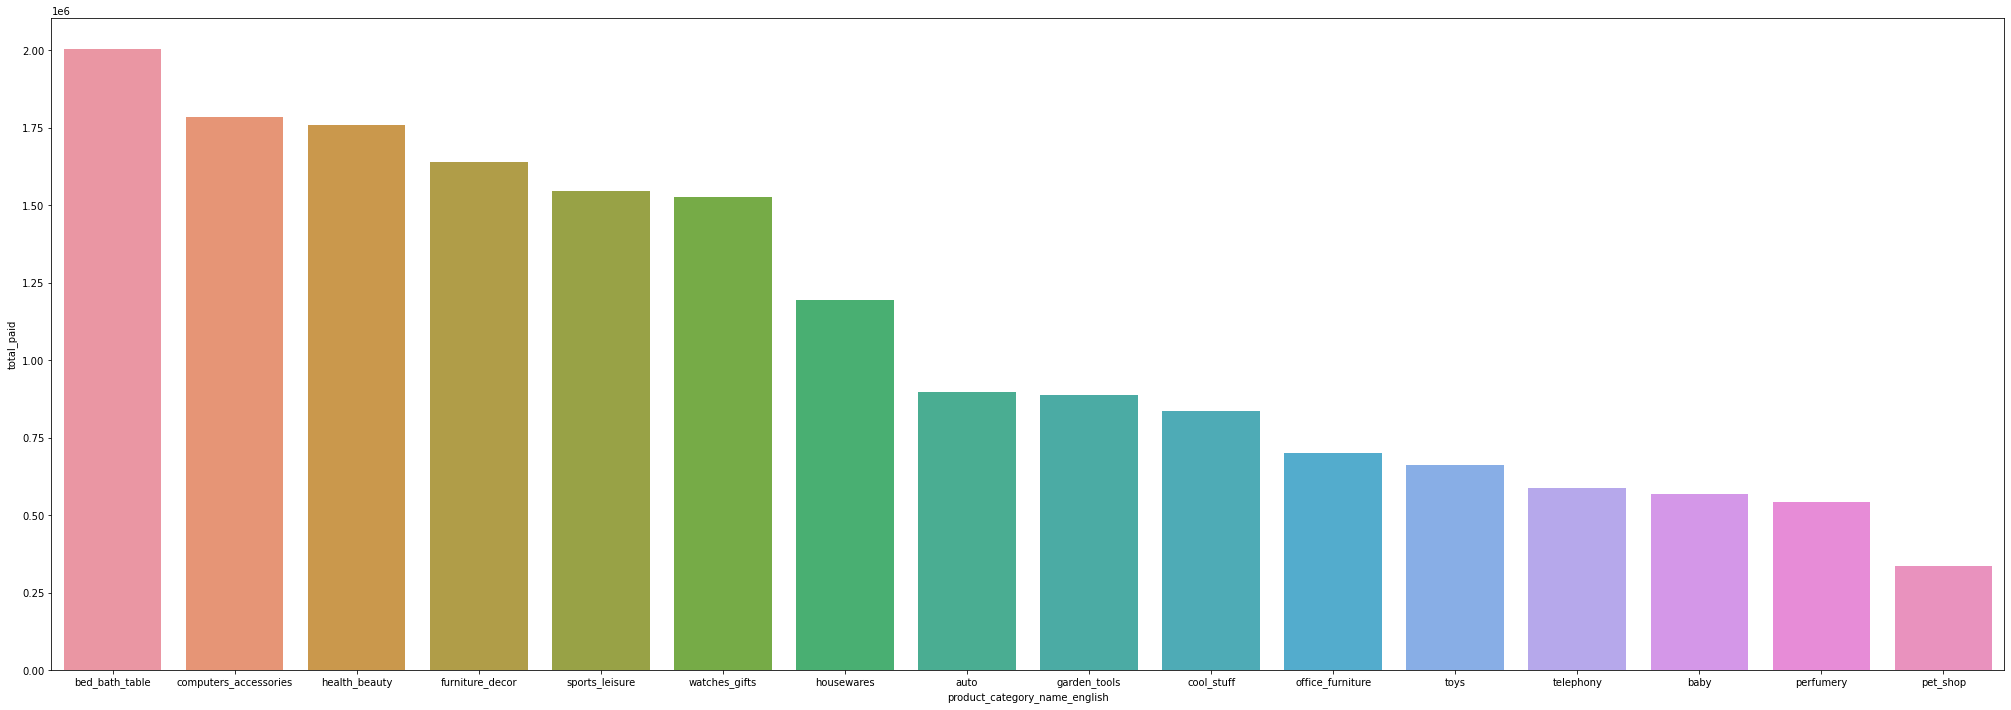

In [10]:
plt.figure(figsize=(35,12))
sns.barplot(data=main_products, x ='product_category_name_english', y= 'total_paid')

In [11]:
main_products

,product_category_name_english,total_paid,Percentage of Sales,Cum Percentage of Sales
0,bed_bath_table,2005187.67,9.141595,9.141595
1,computers_accessories,1784394.17,8.135004,17.276599
2,health_beauty,1759844.96,8.023085,25.299684
3,furniture_decor,1638000.25,7.467598,32.767282
4,sports_leisure,1546546.95,7.050665,39.817947
5,watches_gifts,1527893.11,6.965623,46.783569
6,housewares,1194355.41,5.445033,52.228603
7,auto,898338.51,4.095501,56.324103
8,garden_tools,889147.37,4.053598,60.377701
9,cool_stuff,834714.53,3.805441,64.183142


# 1. Sales per month

In [12]:
per_month = detail['order_purchase_timestamp'].dt.month
sales_p_month = detail.groupby(per_month)['payment_value'].sum().reset_index()
sales_p_month

,order_purchase_timestamp,payment_value
0,1,1745308.42
1,2,1864916.84
2,3,2171798.98
3,4,2155920.25
4,5,2424065.31
5,6,2038337.47
6,7,2274149.27
7,8,2336732.19
8,9,1106560.74
9,10,1225686.94


c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total sales by month')

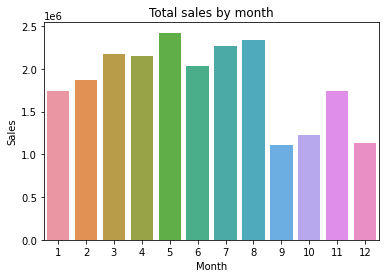

In [13]:
plt.figure()
sns.barplot(sales_p_month['order_purchase_timestamp'], sales_p_month['payment_value'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total sales by month')

# 2. Tần suất đặt hàng trong giờ trong ngày:

In [14]:
detail_hourofweek = detail[['order_purchase_timestamp', 'order_id']]
detail_hourofweek['weekday'] = detail_hourofweek['order_purchase_timestamp'].dt.weekday
detail_hourofweek['hour'] = detail_hourofweek['order_purchase_timestamp'].dt.hour
detail_hourofweek
freq_day_hour = detail_hourofweek.groupby(['weekday', 'hour'])['order_id'].count().reset_index()
freq_day_hour

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\3562339878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detail_hourofweek['weekday'] = detail_hourofweek['order_purchase_timestamp'].dt.weekday
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\3562339878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detail_hourofweek['hour'] = detail_hourofweek['order_purchase_timestamp'].dt.hour


,weekday,hour,order_id
0,0,0,410
1,0,1,163
2,0,2,82
3,0,3,55
4,0,4,26
...,...,...,...
163,6,19,1090
164,6,20,1191
165,6,21,1055
166,6,22,1109


In [15]:
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
freq_day_hour['weekday'] = freq_day_hour.weekday.map(weekmap)

In [16]:
freq_day_hour['weekday'] = pd.Categorical(freq_day_hour['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'], ordered=True)
freq_day_hour

,weekday,hour,order_id
0,Mon,0,410
1,Mon,1,163
2,Mon,2,82
3,Mon,3,55
4,Mon,4,26
...,...,...,...
163,Sun,19,1090
164,Sun,20,1191
165,Sun,21,1055
166,Sun,22,1109


In [17]:
freq_day_hour_pivoted = freq_day_hour.pivot('weekday','hour','order_id')
freq_day_hour_pivoted

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7696\2190426189.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  freq_day_hour_pivoted = freq_day_hour.pivot('weekday','hour','order_id')


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Sun,327,163,97,54,33,42,47,138,254,420,...,825,867,865,968,1120,1090,1191,1055,1109,751
Mon,410,163,82,55,26,27,77,195,595,955,...,1389,1367,1373,1239,1175,1187,1253,1370,1294,886
Tue,365,207,101,50,30,32,82,271,630,1114,...,1436,1269,1364,1220,1148,1099,1163,1253,1215,910
Wed,497,219,108,43,47,33,123,269,624,1057,...,1400,1219,1283,1207,1073,1004,1086,1170,1051,768
Thu,466,207,100,47,54,33,119,274,664,980,...,1253,1184,1307,1095,959,1007,1040,1004,1079,647
Fri,552,243,82,58,54,47,125,253,628,952,...,1204,1226,1259,1016,890,936,874,872,853,659
Sat,380,231,80,53,54,41,87,133,323,536,...,874,885,806,898,848,938,865,794,649,509


Text(0.5, 1.0, 'Heatmap of tranactions over the hour by day')

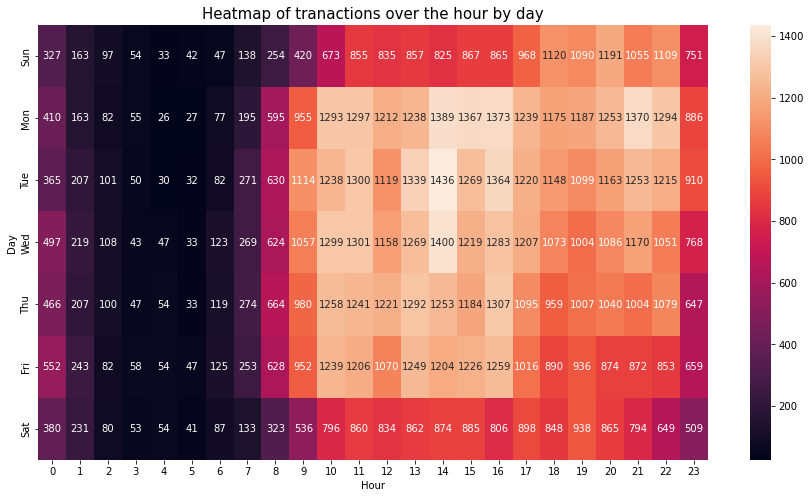

In [18]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(freq_day_hour_pivoted, annot=True, fmt="d")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day", size=15)

# 3. Điểm đánh giá tiêu cực

In [19]:
badrv_p_level = detail.groupby('review_score')['order_id'].count().reset_index()
badrv_p_level = badrv_p_level[badrv_p_level.review_score <= 5]
badrv_p_level

,review_score,order_id
0,1,15937
1,2,4353
2,3,10383
3,4,23022
4,5,69776


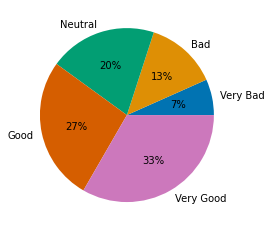

In [20]:
ax = plt.figure()
palette_color = sns.color_palette('colorblind')
plt.pie(badrv_p_level['review_score'],labels= ['Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'], colors=palette_color, autopct='%.0f%%')
ax.set_facecolor("white")
plt.show()

# 4. Average sales by state

In [21]:
avgtrans_by_state = detail.groupby('customer_state').agg({'payment_value':'mean'}).sort_values(by = 'payment_value', ascending = False).reset_index()
avgtrans_by_state

,customer_state,payment_value
0,PB,292.007145
1,AC,272.190196
2,AP,267.378023
3,PI,249.827851
4,AL,248.961674
5,RR,248.786909
6,MT,235.810923
7,PA,235.655351
8,MA,231.589430
9,SE,230.692433


Text(0.5, 1.0, 'Average sales by state')

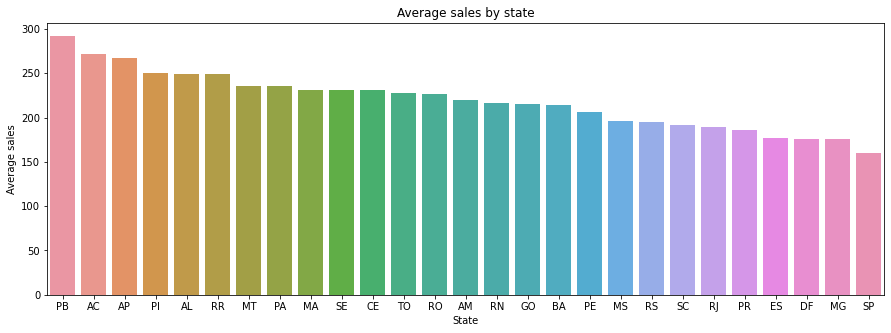

In [22]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='customer_state',y='payment_value', data = avgtrans_by_state)
plt.xlabel('State')
plt.ylabel('Average sales')
plt.title('Average sales by state')

In [52]:
rating_customer_unique_id= detail.groupby('customer_unique_id')['review_score'].mean().reset_index()
rating_customer_unique_id

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,5.0
95416,fffea47cd6d3cc0a88bd621562a9d061,4.0
95417,ffff371b4d645b6ecea244b27531430a,5.0
95418,ffff5962728ec6157033ef9805bacc48,5.0


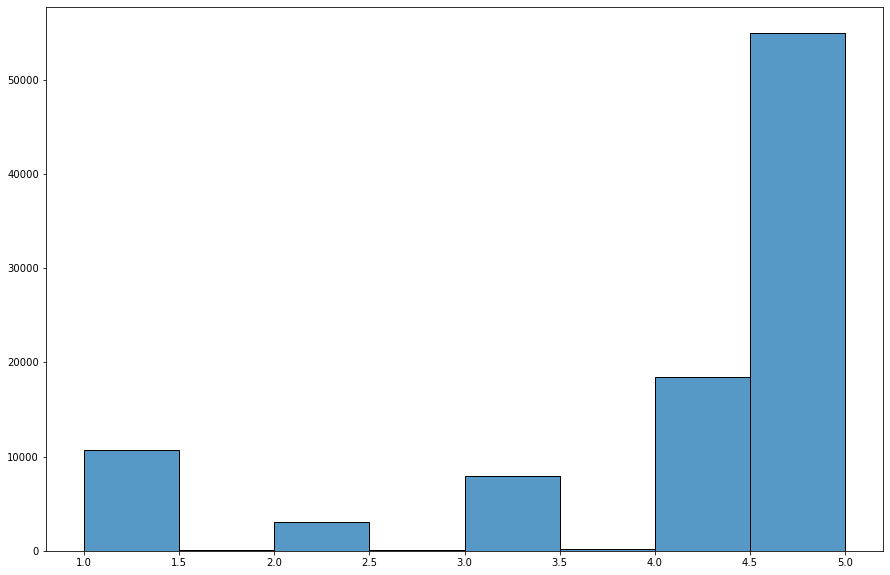

In [53]:
plt.figure(figsize=(15,10))
ax=sns.histplot(x='review_score',data=rating_customer_unique_id,bins=8)
ax.set(xlabel=None,ylabel=None)
plt.show()

In [47]:
rating_product_id=detail.groupby('product_id')['review_score'].mean().reset_index()
rating_product_id

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,4.5
32947,fff81cc3158d2725c0655ab9ba0f712c,4.0
32948,fff9553ac224cec9d15d49f5a263411f,5.0
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


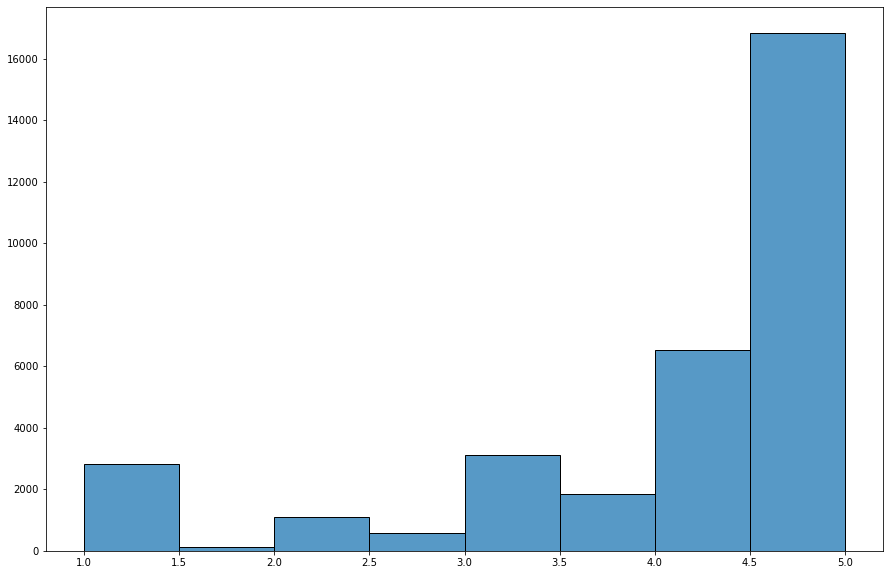

In [49]:
plt.figure(figsize=(15,10))
ax=sns.histplot(x='review_score',data=rating_product_id,bins=8)
ax.set(xlabel=None,ylabel=None)
plt.show()